In [1]:
pip install control

  Using cached control-0.10.1-py3-none-any.whl.metadata (7.6 kB)
Using cached control-0.10.1-py3-none-any.whl (549 kB)
Note: you may need to restart the kernel to use updated packages.


In [20]:
import control
from control.matlab import ctrb, place, obsv

import numpy as np
from numpy.linalg import eig, matrix_rank
from scipy import integrate
import matplotlib.pyplot as plt

In [30]:
# Example 0
A = [[0, 1], 
     [0, 0]]

B = [[0], 
     [1]]

C = [[1,0]]

print(A)

[[0, 1], [0, 0]]


In [31]:
# Compute eigenvalues, eigenvectors
w,v = eig(A)
print('eigenvalues:', w)

eigenvalues: [0. 0.]


In [32]:
# Observability matrix
W_o=obsv(A, B)
matrix_rank(W_o)

2

In [33]:
# Eigenvalue assignment
P = place(np.transpose(A),np.transpose(C),[-1,-2])
L = -np.transpose(P)
print(L)

print(eig(A+L*C))

[[-3.]
 [-2.]]
(array([-2., -1.]), array([[-0.70710678, -0.4472136 ],
       [-0.70710678, -0.89442719]]))


In [34]:
# Closed-loop system matrix
X1 = np.concatenate((A, np.zeros((2,2))), axis=1)
X2 = np.concatenate((-L*C, A+L*C), axis=1)
A_cl = np.concatenate((X1,X2), axis=0)

print(A_cl)

w_cl,v_cl = eig(A_cl)
print('eigenvalues:', w_cl)

[[ 0.  1.  0.  0.]
 [ 0.  0.  0.  0.]
 [ 3.  0. -3.  1.]
 [ 2.  0. -2.  0.]]
eigenvalues: [-2. -1.  0.  0.]


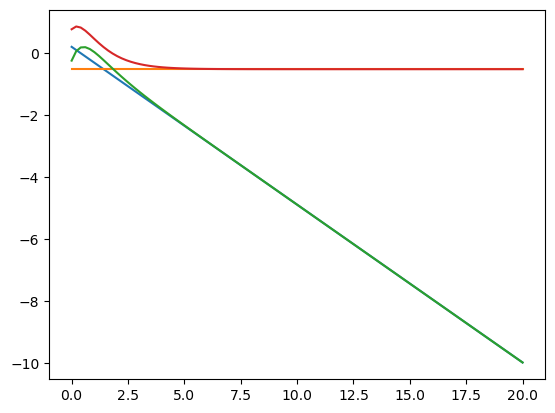

In [35]:
# Plot
def f(t, x):
    return np.dot(A_cl,x)

t0, t1 = 0, 20                # start and end
t = np.linspace(t0, t1, 100)  # the points of evaluation of solution             
x0 = [np.random.uniform(-1, 1), np.random.uniform(-1, 1), np.random.uniform(-1, 1), np.random.uniform(-1, 1)] # initial value
#print(x0)
x = np.zeros((len(t), len(x0)))   # array for solution
x[0,:] = x0
r = integrate.ode(f).set_integrator("dopri5")  # choice of method
r.set_initial_value(x0, t0)   # initial values

for i in range(1, t.size):
   x[i, :] = r.integrate(t[i]) # get one more value, add it to the array
   if not r.successful():
       raise RuntimeError("Could not integrate")
plt.plot(t, x)
plt.show()